In [1]:
import pandas as pd
import numpy as np

from constants.base import Extensions, KaggleDatasetPaths
from utils.ds import DataLoader
from utils.files import get_extension
from tests.utils import get_test_filepath

# Requirements for DataLoader: can read and get pandas DataFrames from local files (supported extensions are CSV, JSON, XLSX)

for ext in Extensions:
    fp_for_test = get_test_filepath(ext.value)
    dataframe = DataLoader(fp_for_test).data
    assert isinstance(dataframe, pd.DataFrame), "Unexpected type of {dataloader} data: {type(dataframe).__name__}."
    print("Seems to have worked fine.")

/home/err/Python/data-science/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DataLoader(/home/err/Python/data-science/data/test/test.csv): reading data.
Seems to have worked fine.
DataLoader(/home/err/Python/data-science/data/test/test.xlsx): reading data.
Seems to have worked fine.
DataLoader(/home/err/Python/data-science/data/test/test.json): reading data.
Seems to have worked fine.


In [2]:
# Also can fetch data using Kaggle API

from utils.files import get_extension

_map_ext_kaggle_ds = {
    # mapping of supported extensions to some randomly chosen Kaggle datasets
    Extensions.CSV: KaggleDatasetPaths.TWITTER_STOCK,
    Extensions.XLSX: KaggleDatasetPaths.YAHOO_FINANCE,
    Extensions.JSON: KaggleDatasetPaths.IRIS,
}
for ext, kaggle_path in _map_ext_kaggle_ds.items():
    print(f"Fetching data in {ext.value} format from {kaggle_path}")
    dataloader = DataLoader.from_kaggle_path(kaggle_path)
    assert (act_ext := get_extension(dataloader.filepath)) == ext.value, f"Unexpected extension of downloaded file: {act_ext}. Expected: {ext.value}."
    assert isinstance(dataframe, pd.DataFrame), "Unexpected type of {dataloader} data: {type(dataframe).__name__}."
    print("Seems to have worked fine.")

Fetching data in csv format from amirmotefaker/twitter-stock-market-dataset
DataLoader(/home/err/.cache/kagglehub/datasets/amirmotefaker/twitter-stock-market-dataset/versions/1/Twitter Stock Market Dataset.csv): reading data.
Seems to have worked fine.
Fetching data in xlsx format from suruchiarora/yahoo-finance-dataset-2018-2023
DataLoader(/home/err/.cache/kagglehub/datasets/suruchiarora/yahoo-finance-dataset-2018-2023/versions/1/yahoo_data.xlsx): reading data.
Seems to have worked fine.
Fetching data in json format from rtatman/iris-dataset-json-version
DataLoader(/home/err/.cache/kagglehub/datasets/rtatman/iris-dataset-json-version/versions/1/iris.json): reading data.
Seems to have worked fine.


In [3]:
# Loading dataframe with data science jobs info from Kaggle and printing head

dataframe = DataLoader.from_kaggle_path("pauloarayasantiago/pokmon-stats-across-generations-and-typings").data
dataframe.head()

DataLoader(/home/err/.cache/kagglehub/datasets/pauloarayasantiago/pokmon-stats-across-generations-and-typings/versions/1/pokemon_dataset.csv): reading data.


,pokemon_id,name,primary_type,secondary_type,first_appreance,generation,category,total_base_stats,hp,attack,defense,special_attack,special_defense,speed
0,1,bulbasaur,grass,poison,red/blue,gen 1,regular,318,45,49,49,65,65,45
1,2,ivysaur,grass,poison,red/blue,gen 1,regular,405,60,62,63,80,80,60
2,3,venusaur,grass,poison,red/blue,gen 1,regular,525,80,82,83,100,100,80
3,4,charmander,fire,NaN,red/blue,gen 1,regular,309,39,52,43,60,50,65
4,5,charmeleon,fire,NaN,red/blue,gen 1,regular,405,58,64,58,80,65,80


In [4]:
# Information on dataset columns and types/# of missing values they have

from utils.ds import get_missing_count, print_missing_counts

for col_name in dataframe.columns:
    missing_count = get_missing_count(dataframe, col_name)
    print(f'Column "{col_name}" has type {dataframe[col_name].dtype}. Number of missing values: {missing_count}.')

# can call print_missing_counts with equivalent output
print_missing_counts(dataframe)

Column "pokemon_id" has type int64. Number of missing values: 0.
Column "name" has type object. Number of missing values: 0.
Column "primary_type" has type object. Number of missing values: 0.
Column "secondary_type" has type object. Number of missing values: 499.
Column "first_appreance" has type object. Number of missing values: 0.
Column "generation" has type object. Number of missing values: 0.
Column "category" has type object. Number of missing values: 0.
Column "total_base_stats" has type int64. Number of missing values: 0.
Column "hp" has type int64. Number of missing values: 0.
Column "attack" has type int64. Number of missing values: 0.
Column "defense" has type int64. Number of missing values: 0.
Column "special_attack" has type int64. Number of missing values: 0.
Column "special_defense" has type int64. Number of missing values: 0.
Column "speed" has type int64. Number of missing values: 0.
Number of missing values in "pokemon_id" column: 0.
Number of missing values in "nam

In [5]:
# Since there are missing values only in secondary_type column which is non-numeric, here's code for inserting some nan values into dataframe for numeric columns

import random

numeric_columns = tuple(col for col in dataframe.columns if dataframe[col].dtype in (np.float64, np.int64))
nans_to_have = 50
for col in numeric_columns:
    nans_to_insert = max(0, nans_to_have - get_missing_count(dataframe, col))
    indices_for_nans = random.sample(range(len(dataframe)), nans_to_insert)
    for i in indices_for_nans:
        dataframe.loc[i, col] = np.nan
    assert get_missing_count(dataframe, col) == nans_to_have
        
# it seems that nans were inserted flawlessly
print_missing_counts(dataframe)

Number of missing values in "pokemon_id" column: 50.
Number of missing values in "name" column: 0.
Number of missing values in "primary_type" column: 0.
Number of missing values in "secondary_type" column: 499.
Number of missing values in "first_appreance" column: 0.
Number of missing values in "generation" column: 0.
Number of missing values in "category" column: 0.
Number of missing values in "total_base_stats" column: 50.
Number of missing values in "hp" column: 50.
Number of missing values in "attack" column: 50.
Number of missing values in "defense" column: 50.
Number of missing values in "special_attack" column: 50.
Number of missing values in "special_defense" column: 50.
Number of missing values in "speed" column: 50.


In [6]:
# Code for filling in missing values with different methods

from utils.ds import fill_missing_values
from constants.base import FillMethods

for col_name, method in (
    ('attack', FillMethods.MEDIAN),
    ('defense', FillMethods.MEAN),
    ('speed', FillMethods.MOST_FREQUENT),
):
    print(f'Filling missing values in "{col_name}" column. Current number of missing values: {get_missing_count(dataframe, col_name)}.')
    fill_missing_values(dataframe, col_name, method=method)
    print(f'Number of missing values after fill: {get_missing_count(dataframe, col_name)}')

# tests/test_fill_missing_values.py contains more checks

Filling missing values in "attack" column. Current number of missing values: 50.
Number of missing values after fill: 0
Filling missing values in "defense" column. Current number of missing values: 50.
Number of missing values after fill: 0
Filling missing values in "speed" column. Current number of missing values: 50.
Number of missing values after fill: 0


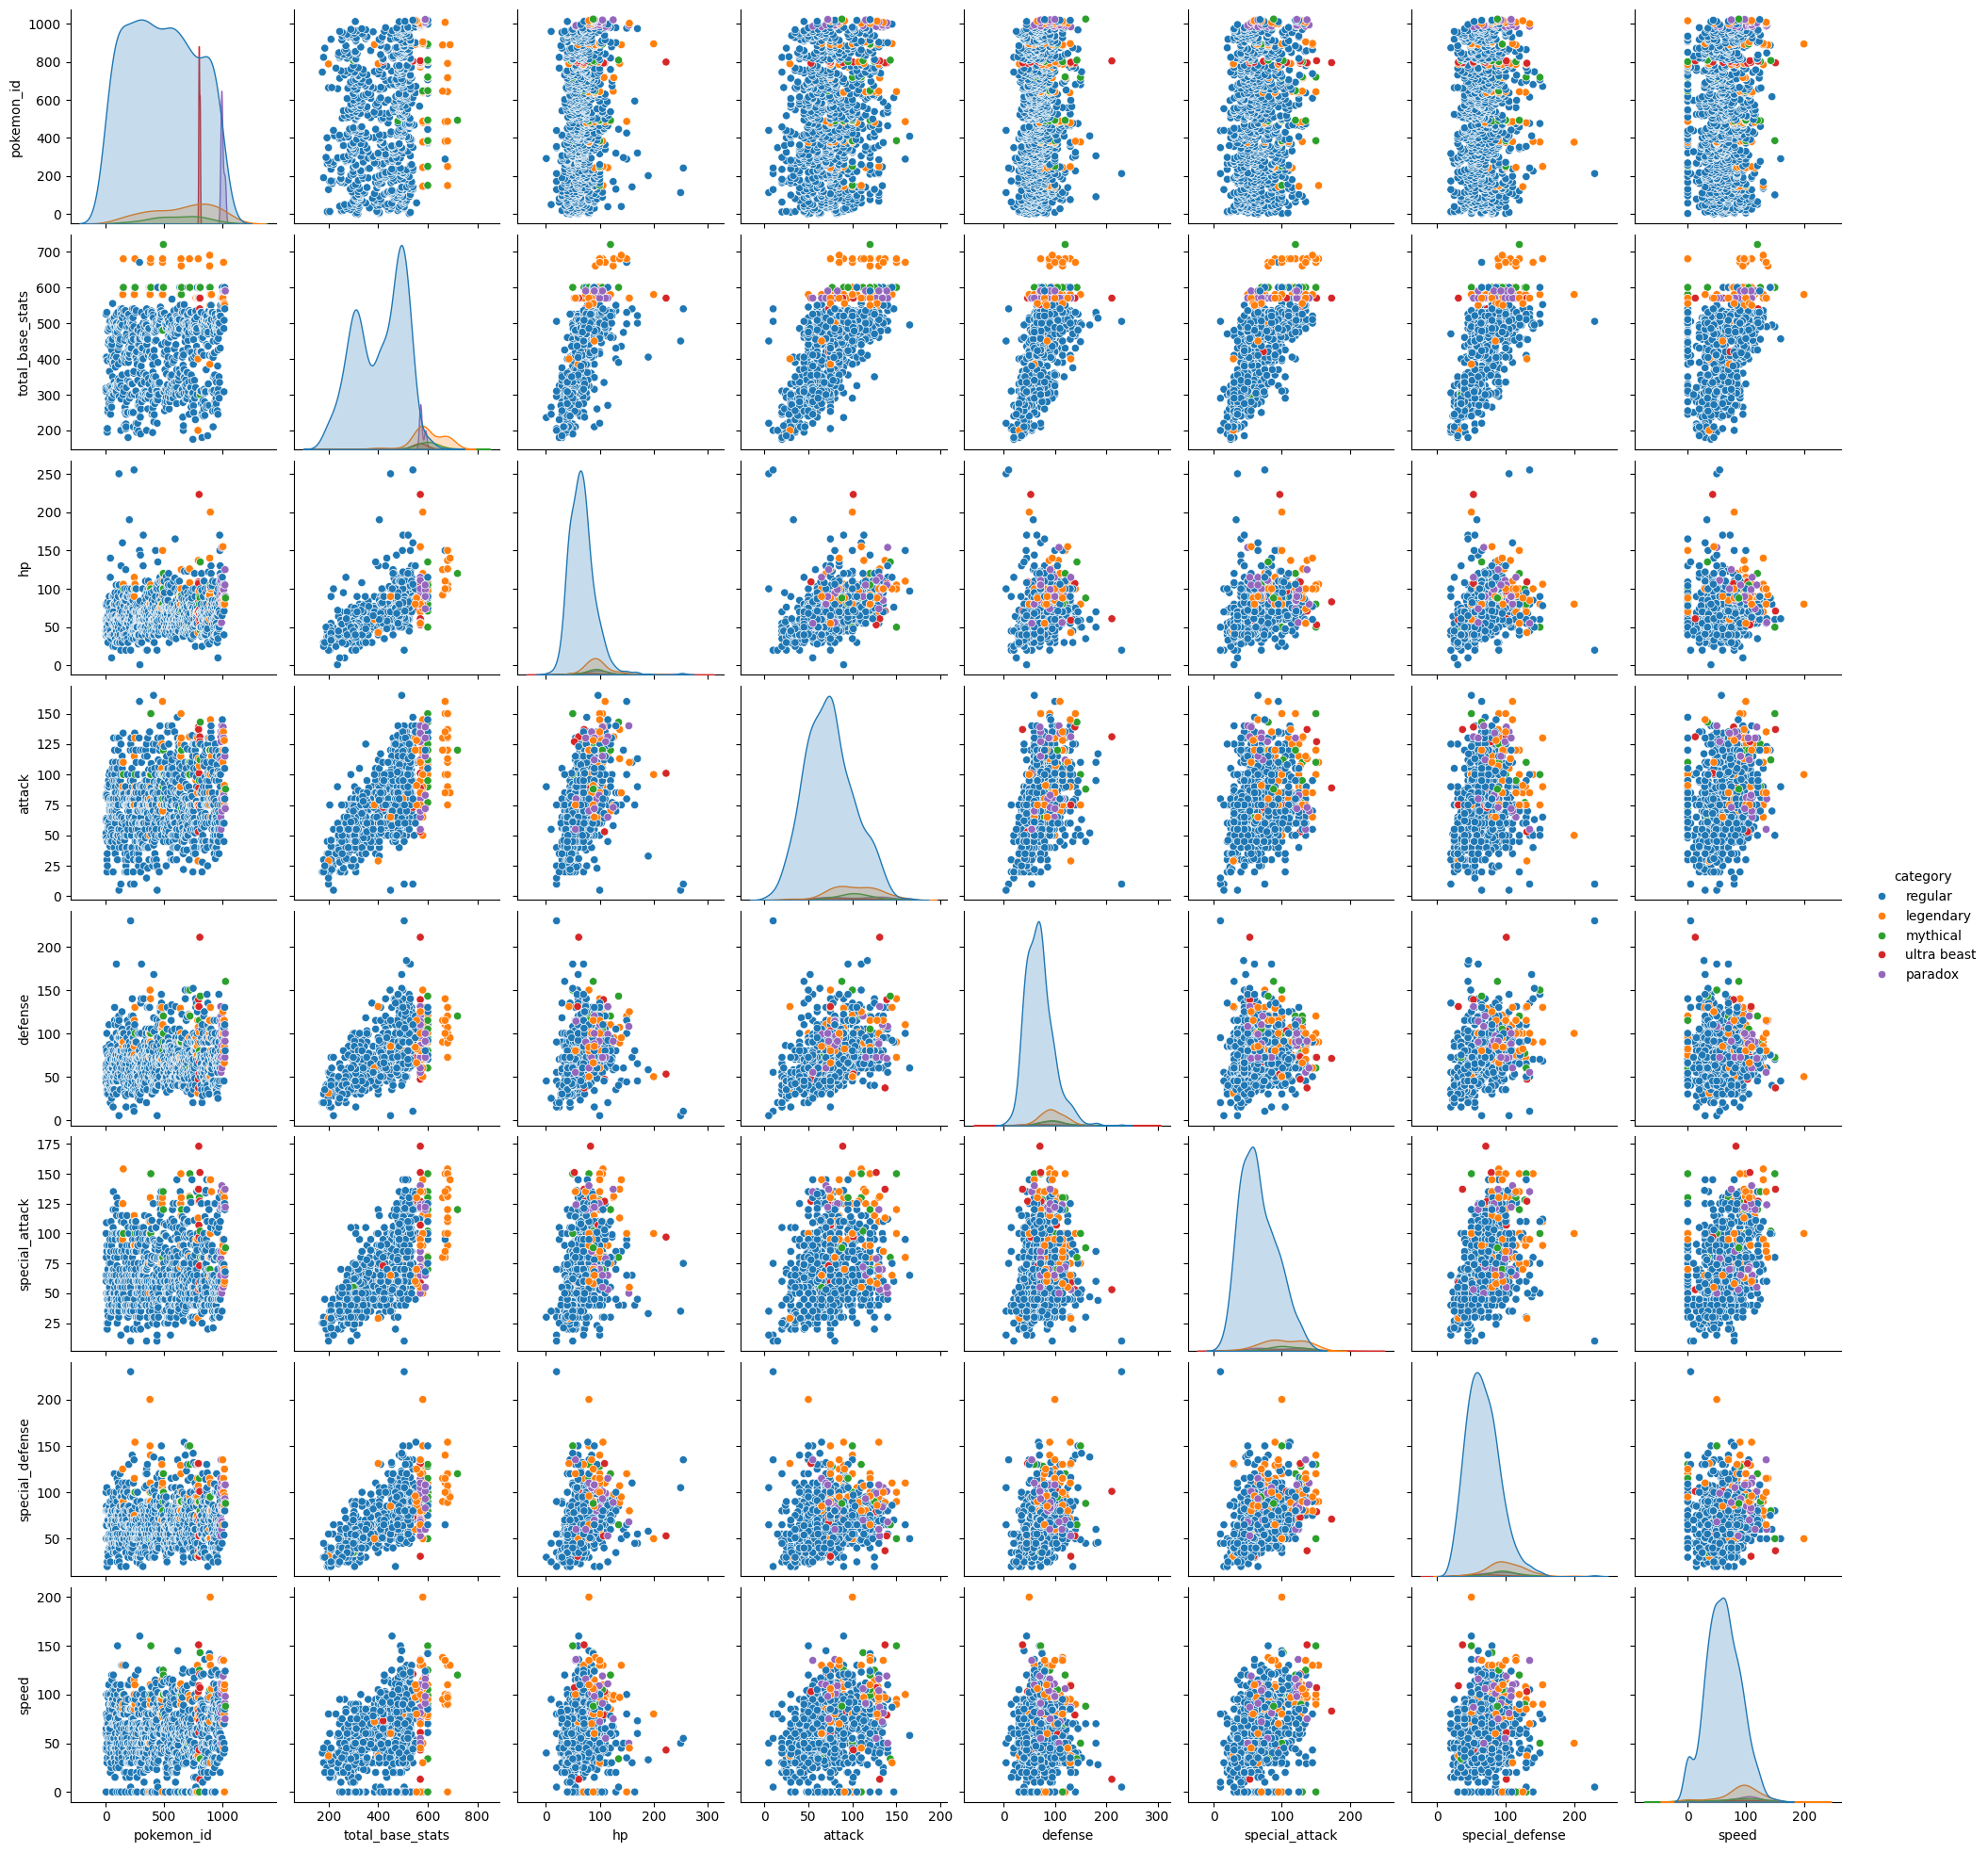

In [7]:
# For visualization, pair plots, scatter plots, linear plots and histograms are required

from utils.ds import get_pair_plot, get_scatter_plot, get_histogram, get_linear_plot

# Pair plots for all numeric columns

get_pair_plot(dataframe, hue="category")

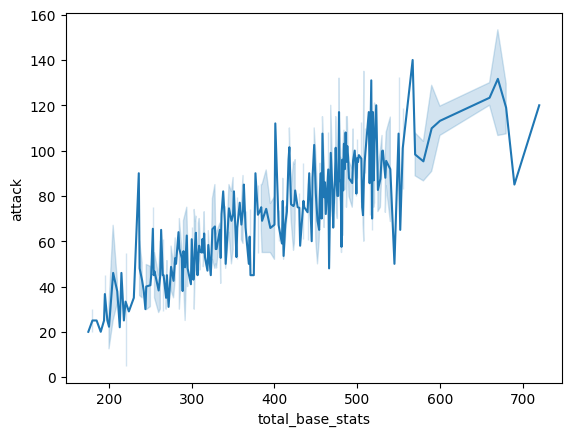

In [8]:
# Linear plot for "total_base_stats" at x and "attack" at y

get_linear_plot(dataframe, x='total_base_stats', y='attack', orient='x')

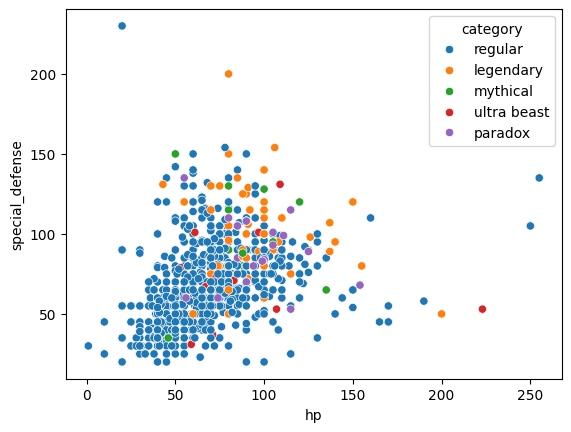

In [9]:
# Scatter plot with "hp" at x and "special_defense" at y with different categories colored differently

get_scatter_plot(dataframe, x='hp', y='special_defense', hue='category')

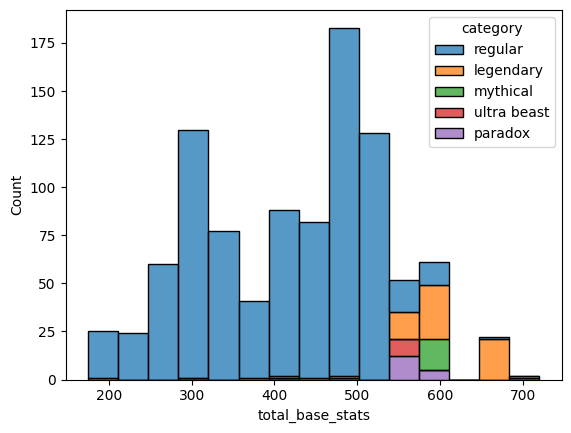

In [10]:
# Histogram for total_base_stats with different categories colored differently

get_histogram(dataframe, x='total_base_stats', hue='category', multiple='stack')